In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.shape

(200, 5)

In [6]:
data['Spending Score (1-100)'].unique

<bound method Series.unique of 0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64>

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X=data.drop(['CustomerID'],axis=1)

In [9]:
X=pd.get_dummies(X)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


k: 1  wcss: 308911.33999999997
k: 2  wcss: 212938.71508951415
k: 3  wcss: 143440.43314900767
k: 4  wcss: 104463.19922884135
k: 5  wcss: 75448.45165554191
k: 6  wcss: 58396.839405039405
k: 7  wcss: 51180.90047021942
k: 8  wcss: 47689.70598167304
k: 9  wcss: 40904.62212283582
k: 10  wcss: 37697.08869310764
k: 11  wcss: 34893.24424866319
k: 12  wcss: 32628.394354196524
k: 13  wcss: 30936.083405483405
k: 14  wcss: 28545.15667600373
k: 15  wcss: 26843.70141525143
k: 16  wcss: 25684.821986346986
k: 17  wcss: 23716.82536231883
k: 18  wcss: 22511.95372471731
k: 19  wcss: 21397.335679779153


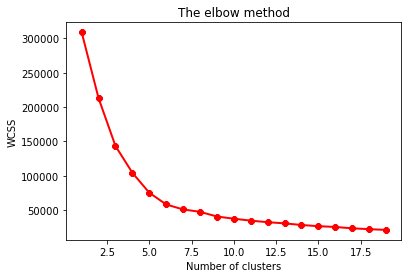

In [10]:
### Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint
    print('k:',i," wcss:",kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), wcss, linewidth=2, color="red", marker ="8")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [12]:
data['Cluster'] = y_kmeans

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [14]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,12.27)})

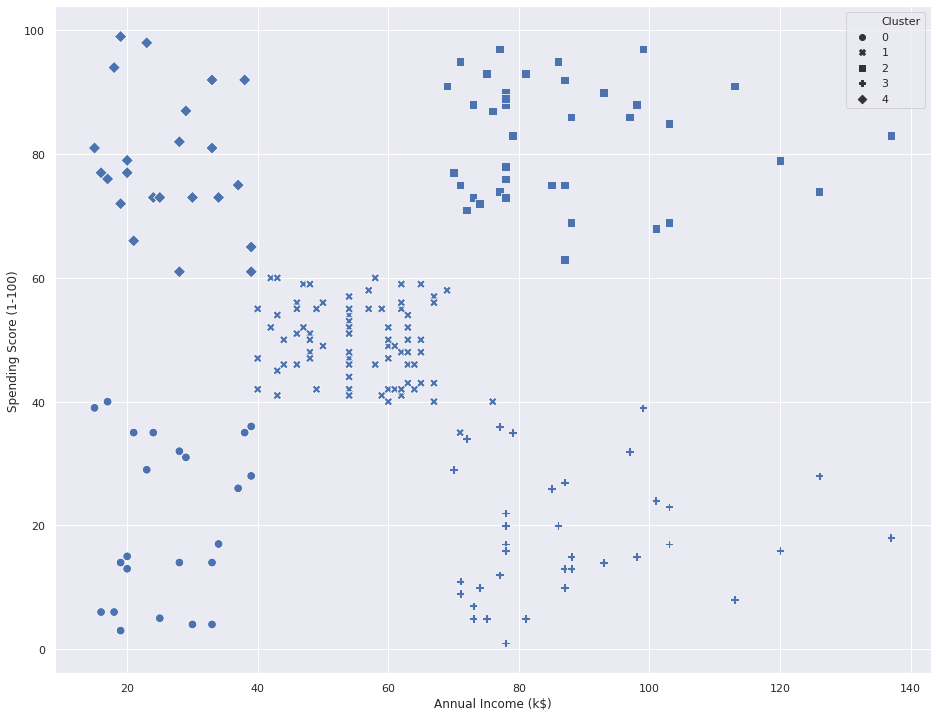

In [16]:
sns.scatterplot(data=data,x="Annual Income (k$)",y="Spending Score (1-100)",style='Cluster',s=75)